In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy
import sklearn
import itertools
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import naive_bayes
from sklearn import metrics    
%matplotlib inline

/Users/travisknop/travis_python/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [3]:
hourly = pd.read_csv("/Users/travisknop/travis_python/homework/FINAL/FINAL/Hourly_Temp_MWH_final.csv")

In [4]:
hourly.head()

,Unnamed: 0,temp,MWH,MWHp
0,2011-01-01 01:00:00,7.7,1438.0,1333.2
1,2011-01-01 02:00:00,7.0,1348.0,1255.4
2,2011-01-01 03:00:00,7.2,1285.7,1205.7
3,2011-01-01 04:00:00,6.1,1252.1,1183.3
4,2011-01-01 05:00:00,6.3,1242.5,1195.2


In [59]:
load_forecast = pd.read_csv("/Users/travisknop/Downloads/loadforecast.csv")
load_forecast.BeginDate = pd.to_datetime(load_forecast.BeginDate)

In [60]:
load_forecast

,BeginDate,HourEnd,Type,Mw
0,2015-12-10 01:00:00,1,TODAY,11200
1,2015-12-10 02:00:00,2,TODAY,10710
2,2015-12-10 03:00:00,3,TODAY,10490
3,2015-12-10 04:00:00,4,TODAY,10470
4,2015-12-10 05:00:00,5,TODAY,10710
5,2015-12-10 06:00:00,6,TODAY,11720
6,2015-12-10 07:00:00,7,TODAY,13730
7,2015-12-10 08:00:00,8,TODAY,14720
8,2015-12-10 09:00:00,9,TODAY,14840
9,2015-12-10 10:00:00,10,TODAY,14800


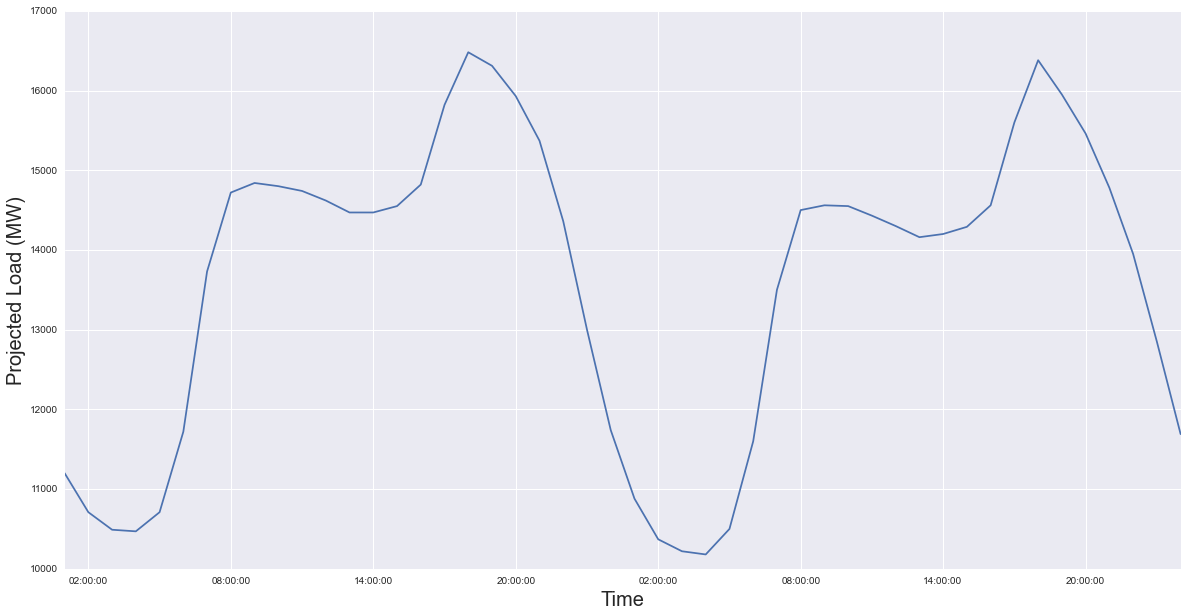

In [61]:
plt.figure(figsize=(20, 10))
plt.plot(load_forecast.BeginDate, load_forecast.Mw)
plt.ylabel("Projected Load (MW)", size=20)
plt.xlabel("Time", size=20)

In [62]:
daysthreefour = load_forecast

In [63]:
import random
from pandas.tseries.offsets import DateOffset

In [64]:
four_day = pd.concat([load_forecast, daysthreefour])

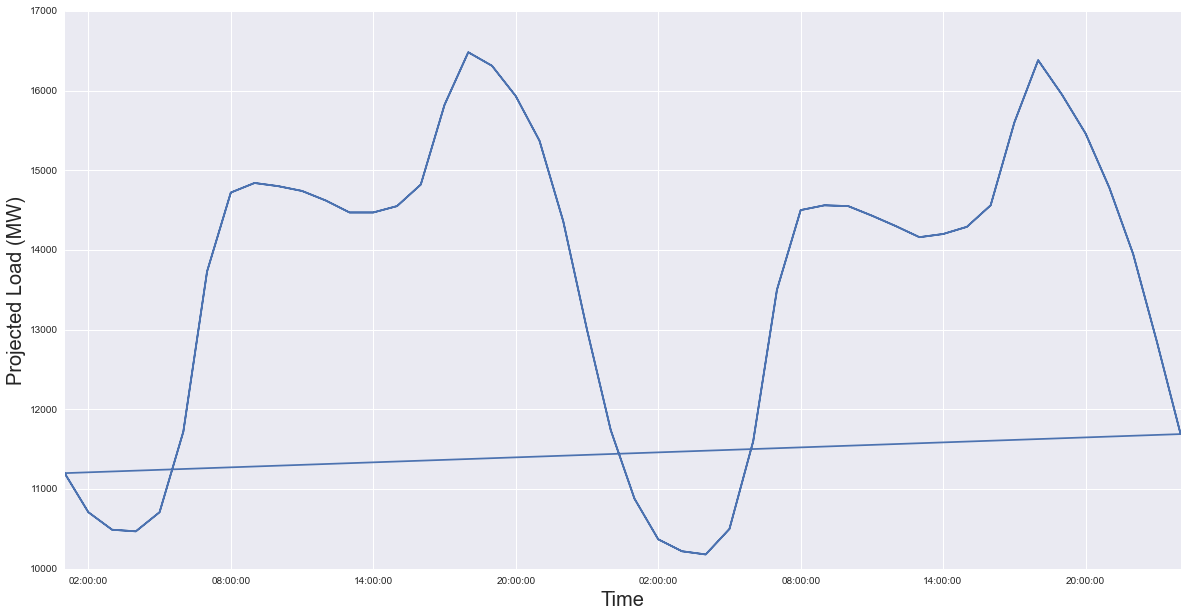

In [65]:
plt.figure(figsize=(20, 10))
plt.plot(four_day.BeginDate, four_day.Mw2)
plt.ylabel("Projected Load (MW)", size=20)
plt.xlabel("Time", size=20)

In [39]:
four_day.to_csv("forecast.csv")

In [105]:
def load_gas():
    gas15 = pd.read_csv("ice_natgas-2015b.csv").iloc[:227]
    gas14 = pd.read_csv("ice_natgas-2014final.csv").iloc[:202]
    gas = pd.concat([gas14, gas15])
    gas = gas.drop(gas.columns[10:], axis=1)
    gas = gas.drop(gas.columns[3:6], axis=1)
    gas = gas.drop(gas.columns[:2], axis=1)
    gas["Delivery start date"] = pd.to_datetime(gas["Delivery start date"])
    return gas

gas = load_gas()
gas

,Delivery start date,Wtd avg price $/MMBtu,Change,Daily volume MMBtu,Number of trades
0,2014-03-18,13.75,-6.64,"17,300",5
1,2014-03-19,6.85,-6.90,"67,100",18
2,2014-03-20,5.36,-1.49,"120,500",27
3,2014-03-21,5.16,-0.19,"39,300",11
4,2014-03-22,7.79,2.62,"59,000",15
5,2014-03-25,12.30,4.51,"59,200",14
6,2014-03-26,14.81,2.50,"87,500",23
7,2014-03-27,7.03,-7.78,"68,100",16
8,2014-03-28,5.00,-2.02,"127,400",24
9,2014-03-29,4.84,-0.16,"163,300",39


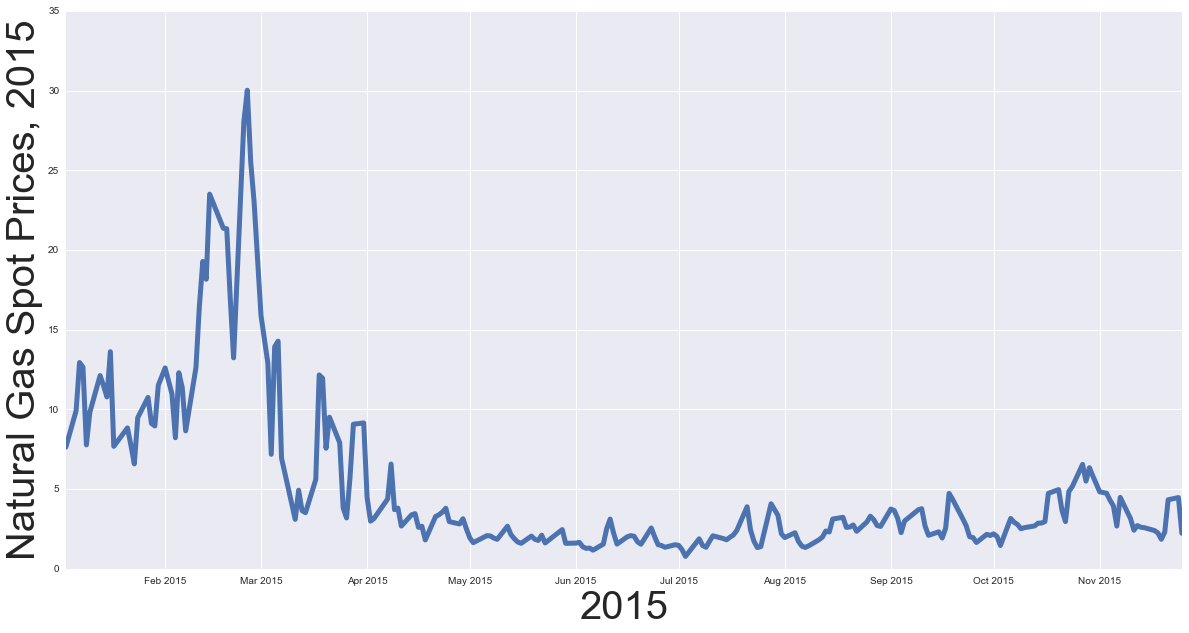

In [93]:
plt.figure(figsize=(20, 10))
plt.plot(gas["Delivery start date"], gas["Wtd avg price $/MMBtu"], linewidth = 5)
plt.ylabel("Natural Gas Spot Prices, 2015", size=40)
plt.xlabel("2015", size=40)